In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import levene
from statsmodels.stats.weightstats import ztest

enem_sp = pd.read_csv('/Users/paull/OneDrive/Área de Trabalho/LEONARDO/python/jupyter/enem_2019_tratado.csv',
                     sep = ',', encoding = 'iso-8859-1')

Objetivo: Analisar a diferença média da nota de redação com relação aos seus componentes.

Obs: amostras independentes = diferença nas médias.

amostras dependendentes = analisa a diferença média.

In [2]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

In [3]:
colegioy.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35151506.0,...,64.0,Inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,Sim
7910,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35151506.0,...,699.5,Inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,Sim
14367,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,780.2,Inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,Sim
22519,"1,90E+11",São Paulo,17,F,1,preta,1,2,privada,35151506.0,...,732.2,Inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,Sim
58184,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,756.3,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [5]:
colegioy.shape

(30, 24)

1) Analisar a classificação das variáveis

In [6]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar se há valores nulos

In [8]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analise de Outliers

<AxesSubplot:xlabel='COMP3'>

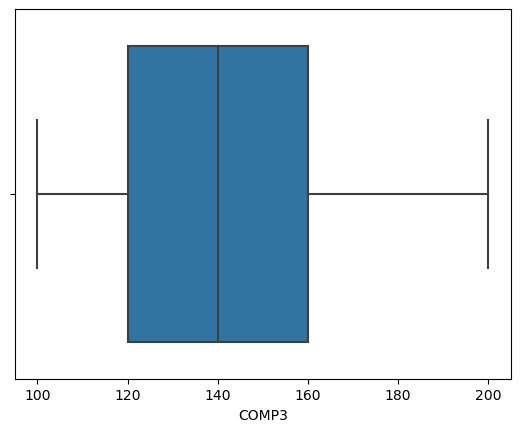

In [9]:
sns.boxplot(data = colegioy, x = "COMP3")

<AxesSubplot:xlabel='COMP1'>

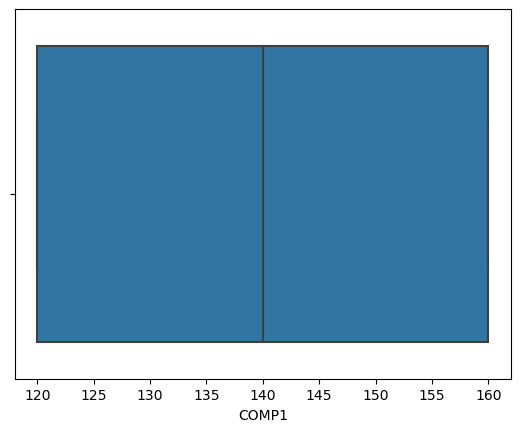

In [10]:
sns.boxplot(data = colegioy, x = "COMP1")

<AxesSubplot:xlabel='COMP2'>

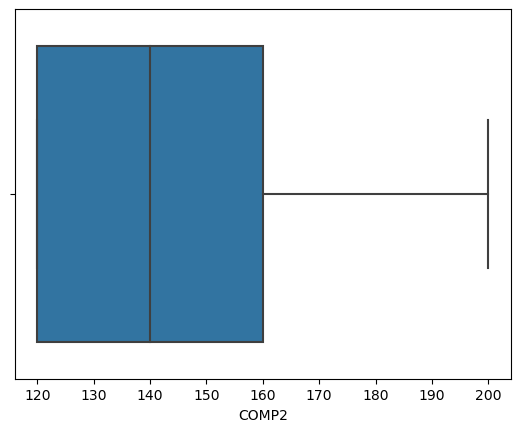

In [11]:
sns.boxplot(data = colegioy, x = "COMP2")

<AxesSubplot:xlabel='COMP4'>

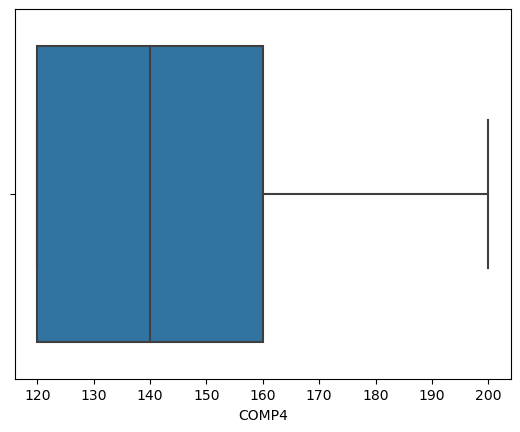

In [12]:
sns.boxplot(data = colegioy, x = "COMP4")

<AxesSubplot:xlabel='COMP5'>

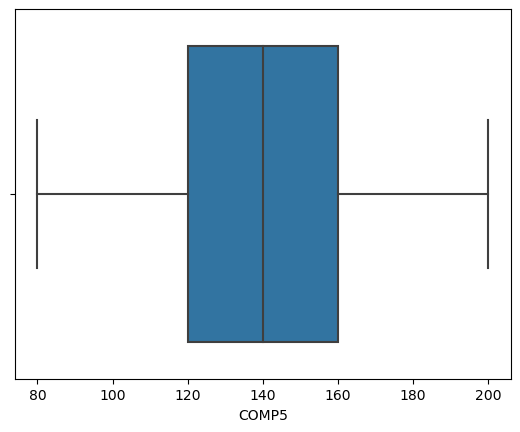

In [15]:
sns.boxplot(data = colegioy, x = "COMP5")

4) Analise da Normalidade

A diferença entre as variáveis é que deve ser normal.

CRITÉRIOS:
Nível de significancia de 0,05 ou 5% (Mais utilizado)
Quando p > 0,05 (distribuição normal).

In [36]:
diferenca1 = colegioy.NOTA_REDACAO - colegioy.COMP1

In [37]:
diferenca2 = colegioy.NOTA_REDACAO - colegioy.COMP2

In [38]:
diferenca3 = colegioy.NOTA_REDACAO - colegioy.COMP3

In [39]:
diferenca5 = colegioy.NOTA_REDACAO - colegioy.COMP4

In [40]:
diferenca4 = colegioy.NOTA_REDACAO - colegioy.COMP5

Teste de Shapiro Wilk para as diferenças

In [41]:
stats.shapiro(diferenca1)

ShapiroResult(statistic=0.9205223321914673, pvalue=0.027671510353684425)

In [42]:
stats.shapiro(diferenca2)

ShapiroResult(statistic=0.9494082927703857, pvalue=0.16299790143966675)

In [43]:
stats.shapiro(diferenca3)

ShapiroResult(statistic=0.9186265468597412, pvalue=0.024711981415748596)

In [32]:
stats.shapiro(diferenca4)

ShapiroResult(statistic=0.918871283531189, pvalue=0.025074632838368416)

In [33]:
stats.shapiro(diferenca5)

ShapiroResult(statistic=0.9099215865135193, pvalue=0.014812746085226536)

In [ ]:
pvalue > 0,05 --- 2

### Teste t

comparação das médias das notas dos componentes que passaram no teste de normalidade

Ho = NÃO HÁ DIFERENÇA ENTRE AS DIFERENÇAS DAS MÉDIAS DA REDAÇÃO COM OS SEUS COMPONENTES

Ha =  HÁ DIFERENÇA ENTRE AS DIFERENÇAS DAS MÉDIAS DA REDAÇÃO COM OS SEUS COMPONENTES

In [46]:
stat, p = stats.ttest_rel(diferenca1, diferenca2)
print('Estatística de teste: {}'. format(round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 2
p-valor: 0.8690991006


Obs:


ind: valores independentes;
rel: valores correlacionados

In [47]:
stat, p = stats.ttest_rel(colegioy.COMP2, colegioy.COMP1)
print('Estatística de teste: {}'. format(round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 2
p-valor: 0.8690991006


Quando analisada a diferença entre a componente e a nota de redação a partir do teste t não se observa uma mudança com relação a analise do teste t para as próprias componentes. Visto que os valores conservam a distribuição, e apenas joga os valores para baixo

### Interpretação:


Teste estatístico: 0,17

p_valor = 0,869


Conclusão: Estatísticamente, com o intervalo de confiança de 95% não há evidências para afirmar que existe diferença estatística da média entre a redação e os componentes 1 e 2 do colégio y